In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Import Data

In [2]:
happiness_report = "world_happiness_report_2019_original_file.csv"
region="Country-names-with-region.csv"

In [3]:
happiness_report_df = pd.read_csv(happiness_report)
region_df=pd.read_csv(region)

In [4]:
happiness_report_df.head()

,COU,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,AFG,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
region_df.head()

,Country name,Region
0,Afghanistan,South Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Latin America and Caribbean


## Merge Data

In [6]:
happiness_df=happiness_report_df.merge(region_df, on='Country name', how='left')

In [7]:
happiness_df.head()

,COU,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
0,AFG,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
1,AFG,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia


In [8]:
happiness_df.columns

Index(['COU', 'Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trus

In [9]:
happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']]

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,South Asia,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,...,NaN,NaN,0.304368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,South Asia,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,...,NaN,NaN,0.413974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,South Asia,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,...,NaN,NaN,0.596918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,South Asia,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,...,NaN,NaN,0.418629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,South Asia,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,...,NaN,NaN,0.286599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
happy_df = happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup']]
happy_df.head()

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


## Rename and Clean Data

In [11]:
report_df= happy_df.rename(columns={'Life Ladder':'Happiness_Score', 'Log GDP per capita':'GDP', 'Freedom to make life choices':'Freedom'})
report_df.head()

,Country name,Region,Year,Happiness_Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [12]:
report_df.dropna()

,Country name,Region,Year,Happiness_Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
36,Argentina,Latin America and Caribbean,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.439,0.368422,0.169295
37,Argentina,Latin America and Caribbean,2010,6.441067,9.836924,0.926799,67.300003,0.730258,-0.121725,0.854695,0.846136,0.210975,0.351856,0.138446,-0.469284,2.107838,0.327250,0.430,0.366742,0.228952
49,Armenia,Commonwealth of Independent States,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.280,0.427577,0.156644
73,Austria,Western Europe,2010,7.302679,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085,1.753248,0.240083,0.303,0.367440,0.300665
108,Bangladesh,South Asia,2010,4.858481,7.800871,0.549398,60.700001,0.659006,-0.010436,0.773530,0.628580,0.292425,0.646873,-0.846942,-0.860694,1.930316,0.397309,0.321,0.450517,0.148750
120,Belarus,Commonwealth of Independent States,2009,5.564131,9.618182,0.907778,62.000000,0.679293,-0.210205,0.675543,0.565597,0.223292,0.548333,-0.529404,-0.977223,1.937372,0.348189,0.277,0.338963,0.356408
133,Belgium,Western Europe,2010,6.853514,10.623421,0.930570,70.800003,0.806930,0.018613,0.697366,0.828259,0.240364,0.336516,1.085667,1.445168,1.603352,0.233946,0.284,0.393781,0.306121
160,Bolivia,Latin America and Caribbean,2009,6.085579,8.571310,0.831320,60.500000,0.778939,-0.030179,0.762605,0.796764,0.372369,0.468150,-0.250256,-0.805518,1.977046,0.324874,0.492,0.417889,0.144024
195,Brazil,Latin America and Caribbean,2009,7.000832,9.521485,0.912818,64.260002,0.766716,-0.065055,0.722515,0.832505,0.274103,0.427179,0.344150,-0.055284,2.236215,0.319421,0.537,0.428937,0.134151
206,Bulgaria,Central and Eastern Europe,2010,3.912276,9.634516,0.843272,65.699997,0.544536,-0.146652,0.940970,0.545824,0.237594,0.365286,0.445788,0.127513,1.968557,0.503174,0.357,0.376450,0.222936


In [13]:
report_df.columns

Index(['Country name', 'Region', 'Year', 'Happiness_Score', 'GDP',
       'Social support', 'Healthy life expectancy at birth', 'Freedom',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup'],
      dtype='object')

## Data Analysis

In [14]:
df = report_df.apply (pd.to_numeric, errors='coerce')
df = report_df.dropna()
print (df)

            Country name                              Region  Year  \
36             Argentina         Latin America and Caribbean  2009   
37             Argentina         Latin America and Caribbean  2010   
49               Armenia  Commonwealth of Independent States  2009   
73               Austria                      Western Europe  2010   
108           Bangladesh                          South Asia  2010   
120              Belarus  Commonwealth of Independent States  2009   
133              Belgium                      Western Europe  2010   
160              Bolivia         Latin America and Caribbean  2009   
195               Brazil         Latin America and Caribbean  2009   
206             Bulgaria          Central and Eastern Europe  2010   
292                Chile         Latin America and Caribbean  2009   
318             Colombia         Latin America and Caribbean  2009   
319             Colombia         Latin America and Caribbean  2010   
353           Costa 

In [15]:
report_df.groupby('Region')['Happiness_Score','GDP'].mean().sort_values(by="Happiness_Score", ascending=False)

,Happiness_Score,GDP
Region,,
North America and ANZ,7.286995,10.650564
Western Europe,6.808758,10.623527
Latin America and Caribbean,6.005871,9.212069
East Asia,5.592699,10.071700
Central and Eastern Europe,5.444195,9.813616
Middle East and North Africa,5.391712,9.748548
Southeast Asia,5.342963,9.128659
Commonwealth of Independent States,5.145158,9.027644
South Asia,4.587340,8.206614


In [16]:
def correlation_matrix(df):
    plt.figure(figsize=(14,12))
    sns.heatmap(df.corr(), center=0, annot=True, cmap="RdBu_r", linewidths = .5, fmt='.2f',annot_kws={'size': 10})   

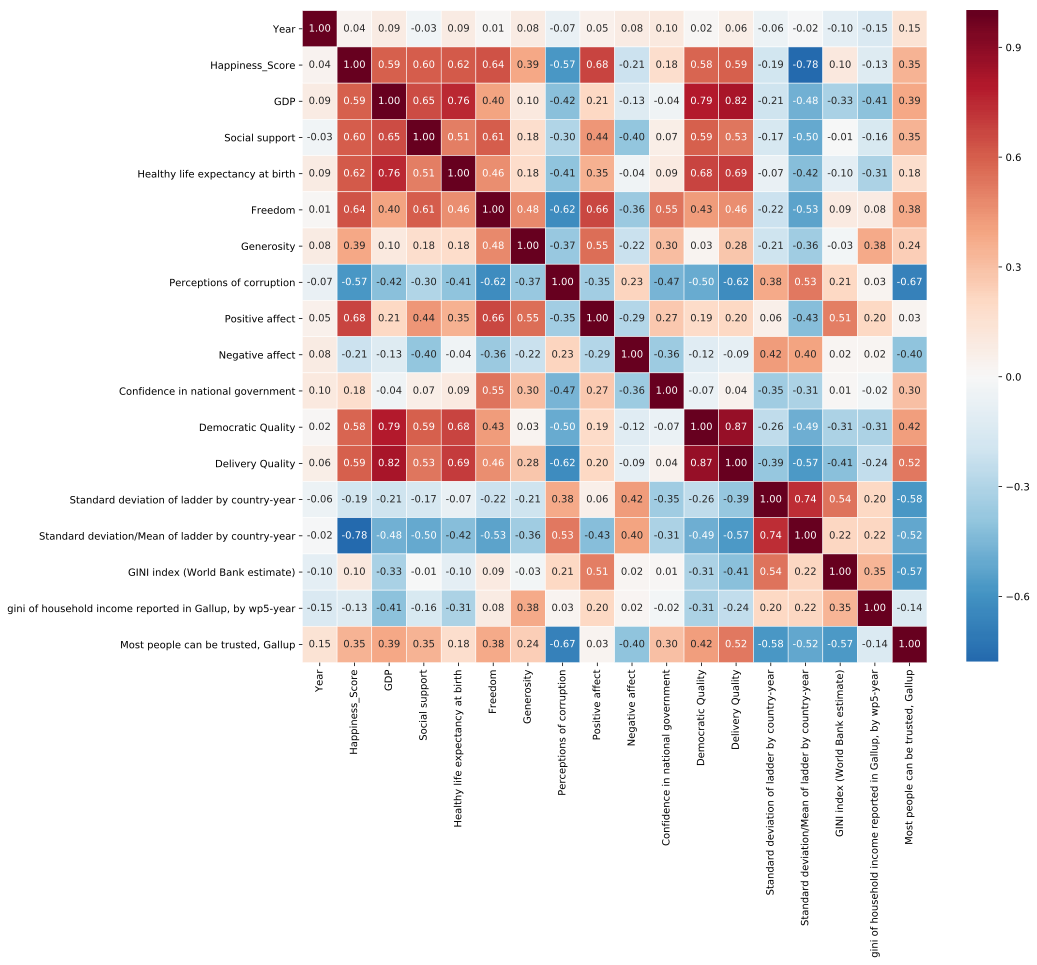

In [17]:
correlation_matrix(df)
plt.savefig("correlations.svg")

## Regression Model

In [18]:
# First we prepare the data to use a model
df1 = df.drop(["Country name","Region"], axis=1)
y = df1["Happiness_Score"]
X = df1.drop(["Happiness_Score"], axis=1)

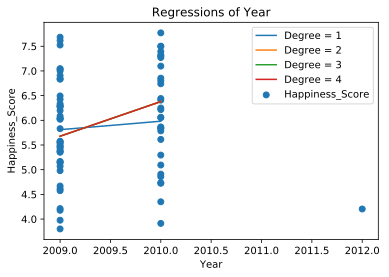

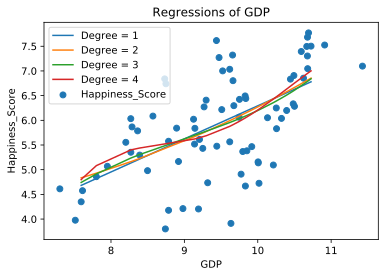

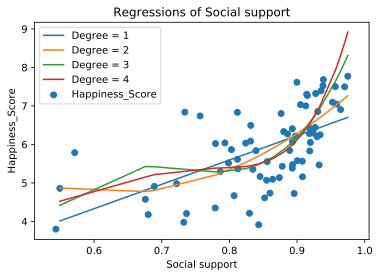

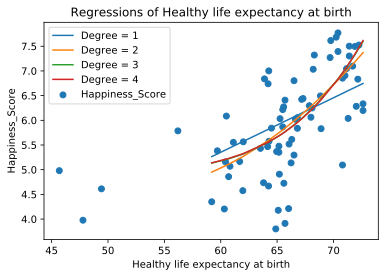

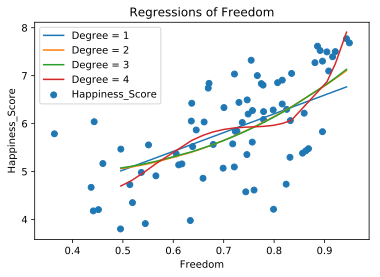

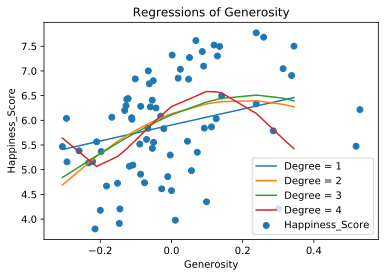

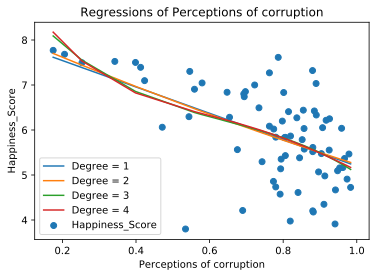

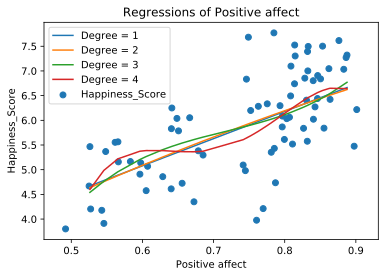

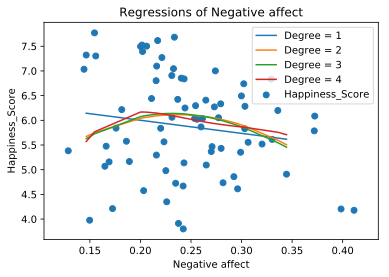

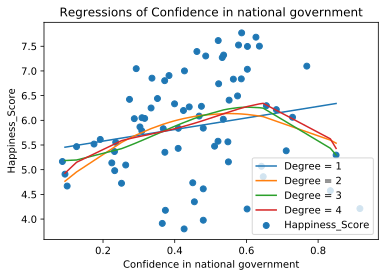

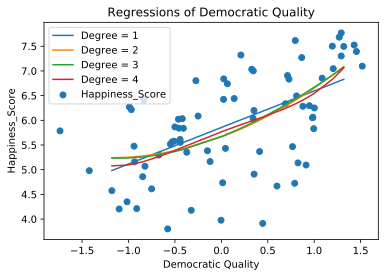

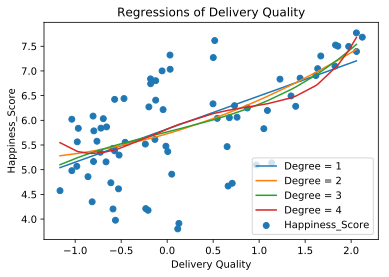

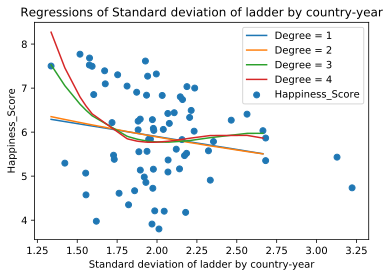

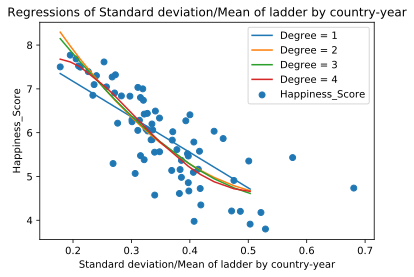

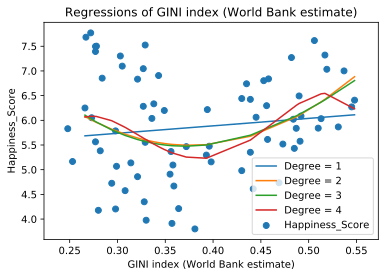

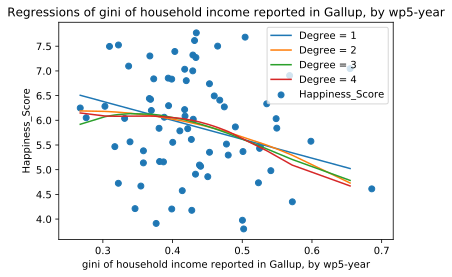

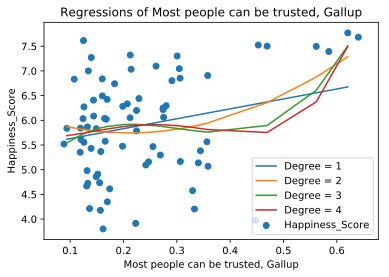

In [19]:
for feature in X.columns.values.tolist():
    X = df1.drop(["Happiness_Score"], axis=1)
    X = X[feature]
    X = X.values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    plt.title("Regressions of " + feature)
    plt.scatter(X, y)

    degrees = [1,2,3,4]
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)

        # predicting on test data-set
        y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

        # Plotting the regression

        new_x, new_y = zip(*sorted(zip(X_test, y_test_predict)))
        plt.plot(new_x, new_y, label="Degree = " + str(degree))

        plt.xlabel(feature)
        plt.ylabel("Happiness_Score")
        plt.legend()
        plt.savefig("start.svg")
    plt.show()
    plt.close()

These plots can show us how adjusted are the regressions with the data using only an indicator each time. Now we will try to use all the columns to predict the happiness score, but if we want to plot the regression result line we will need to perform a PCA to the data.

Applying PCA to our data we will obtain a single “feature” that will allow us to represent all the attribute columns in a single axis.

C:\Users\carit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\carit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



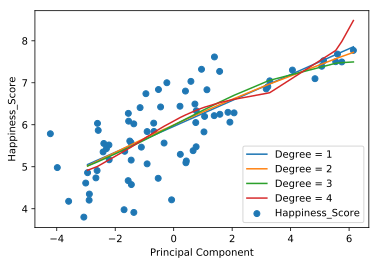

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# First we prepare the data to use a model
reg_data = df.drop(["Country name","Region"], axis=1)
y = reg_data["Happiness_Score"]
X = reg_data.drop(["Happiness_Score"], axis=1)

# Normalisation and PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

plt.scatter(X_pca, y)

degrees = [1,2,3,4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # Plotting the regression
    new_x, new_y = zip(*sorted(zip(X_test, y_test_predict)))
    plt.plot(new_x, new_y, label="Degree = " + str(degree))
    plt.xlabel("Principal Component")
    plt.ylabel("Happiness_Score")
    plt.legend()
    plt.savefig("PCA.svg")
plt.show()
plt.close()



## Model Evaluation

In [21]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
print("RMSE test (PCA): " + str(rmse_test))
print("R2square test (PCA): " + str(r2_test))

RMSE test (PCA): 0.6725808408594148
R2square test (PCA): 0.5840155004495273


The Rsquare is the proportion of the variance in the dependent variable that is predictable from the independent variable. Basically it says how good the regression function is fitting the data. The value goes between 0 and 1, being 1 the best value and 0 the worst.

RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Talking about the performance of the regression models, the R-square of the showed models keeps around a 0.7 value. By looking at the distribution of the data on the previous charts, it can be observed that the regression functions are fitting the data properly.

There are difficult data distributions for a regression model to fit, as for example the one observed in the PCA chart. The more high the degree of the regression polynomial, the better fitted the data. Nonetheless, the increase of the degree of the model can cause overfitting, so this is an aspect that has to be treated carefully to build a correct regression model.